## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  90.745253  1408.940390  0.235166  5.392478  1.210533
1   7.330406  1275.282223  0.891956  2.796267  1.581135
2  70.429517  1072.694968  0.639127  1.832866  1.580756
3  82.676793   829.950484  0.472421  4.491107  1.320819
4  77.248192   985.397566  0.303197  4.717834  1.313436


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9182917	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.9108458	total: 62.5ms	remaining: 31.2s
2:	learn: 0.9000954	total: 63ms	remaining: 20.9s
3:	learn: 0.8924679	total: 63.5ms	remaining: 15.8s
4:	learn: 0.8859195	total: 63.9ms	remaining: 12.7s
5:	learn: 0.8798267	total: 64.3ms	remaining: 10.6s
6:	learn: 0.8720091	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8629474	total: 65ms	remaining: 8.06s
8:	learn: 0.8562523	total: 65.3ms	remaining: 7.19s
9:	learn: 0.8487445	total: 65.5ms	remaining: 6.49s
10:	learn: 0.8418894	total: 65.8ms	remaining: 5.91s
11:	learn: 0.8347951	total: 66ms	remaining: 5.44s
12:	learn: 0.8281302	total: 66.3ms	remaining: 5.03s
13:	learn: 0.8202420	total: 66.5ms	remaining: 4.68s
14:	learn: 0.8110790	total: 66.7ms	remaining: 4.38s
15:	learn: 0.8025764	total: 67ms	remaining: 4.12s
16:	learn: 0.7954615	total: 67.2ms	remaining: 3.88s
17:	learn: 0.7883460	total: 67.5ms	remaining: 3.68s
18:	learn: 0.7831249	total: 67.7ms	remaining: 3.49s


52:	learn: 0.5943765	total: 80.9ms	remaining: 1.44s
53:	learn: 0.5895118	total: 81.1ms	remaining: 1.42s
54:	learn: 0.5845568	total: 82.2ms	remaining: 1.41s
55:	learn: 0.5795890	total: 82.5ms	remaining: 1.39s
56:	learn: 0.5749618	total: 82.7ms	remaining: 1.37s
57:	learn: 0.5705279	total: 83.1ms	remaining: 1.35s
58:	learn: 0.5658743	total: 83.3ms	remaining: 1.33s
59:	learn: 0.5616663	total: 83.7ms	remaining: 1.31s
60:	learn: 0.5584730	total: 84.1ms	remaining: 1.29s
61:	learn: 0.5540480	total: 84.5ms	remaining: 1.28s
62:	learn: 0.5487043	total: 84.8ms	remaining: 1.26s
63:	learn: 0.5436613	total: 85.1ms	remaining: 1.24s
64:	learn: 0.5398874	total: 85.3ms	remaining: 1.23s
65:	learn: 0.5360286	total: 85.6ms	remaining: 1.21s
66:	learn: 0.5318388	total: 85.9ms	remaining: 1.2s
67:	learn: 0.5275681	total: 86.5ms	remaining: 1.19s
68:	learn: 0.5245130	total: 87ms	remaining: 1.17s
69:	learn: 0.5210558	total: 87.5ms	remaining: 1.16s
70:	learn: 0.5168035	total: 87.9ms	remaining: 1.15s
71:	learn: 0.51

280:	learn: 0.1743112	total: 182ms	remaining: 466ms
281:	learn: 0.1734999	total: 183ms	remaining: 465ms
282:	learn: 0.1730330	total: 183ms	remaining: 464ms
283:	learn: 0.1724769	total: 183ms	remaining: 463ms
284:	learn: 0.1722604	total: 184ms	remaining: 461ms
285:	learn: 0.1719079	total: 184ms	remaining: 460ms
286:	learn: 0.1710267	total: 185ms	remaining: 459ms
287:	learn: 0.1699755	total: 185ms	remaining: 458ms
288:	learn: 0.1692820	total: 186ms	remaining: 457ms
289:	learn: 0.1686936	total: 186ms	remaining: 455ms
290:	learn: 0.1683614	total: 186ms	remaining: 454ms
291:	learn: 0.1673536	total: 187ms	remaining: 453ms
292:	learn: 0.1667045	total: 187ms	remaining: 452ms
293:	learn: 0.1663936	total: 188ms	remaining: 451ms
294:	learn: 0.1656866	total: 188ms	remaining: 450ms
295:	learn: 0.1651733	total: 189ms	remaining: 449ms
296:	learn: 0.1648192	total: 189ms	remaining: 448ms
297:	learn: 0.1644501	total: 190ms	remaining: 447ms
298:	learn: 0.1640822	total: 190ms	remaining: 446ms
299:	learn: 

453:	learn: 0.0999233	total: 262ms	remaining: 315ms
454:	learn: 0.0996662	total: 263ms	remaining: 315ms
455:	learn: 0.0995854	total: 263ms	remaining: 314ms
456:	learn: 0.0991987	total: 264ms	remaining: 313ms
457:	learn: 0.0990952	total: 264ms	remaining: 313ms
458:	learn: 0.0988092	total: 265ms	remaining: 312ms
459:	learn: 0.0987322	total: 265ms	remaining: 311ms
460:	learn: 0.0986326	total: 266ms	remaining: 311ms
461:	learn: 0.0985774	total: 266ms	remaining: 310ms
462:	learn: 0.0983030	total: 267ms	remaining: 309ms
463:	learn: 0.0980553	total: 267ms	remaining: 309ms
464:	learn: 0.0979638	total: 268ms	remaining: 308ms
465:	learn: 0.0979105	total: 268ms	remaining: 307ms
466:	learn: 0.0975369	total: 268ms	remaining: 306ms
467:	learn: 0.0972958	total: 269ms	remaining: 305ms
468:	learn: 0.0968396	total: 269ms	remaining: 305ms
469:	learn: 0.0967450	total: 270ms	remaining: 304ms
470:	learn: 0.0965106	total: 270ms	remaining: 303ms
471:	learn: 0.0960671	total: 270ms	remaining: 302ms
472:	learn: 

682:	learn: 0.0598848	total: 363ms	remaining: 169ms
683:	learn: 0.0596157	total: 364ms	remaining: 168ms
684:	learn: 0.0594967	total: 364ms	remaining: 167ms
685:	learn: 0.0592319	total: 365ms	remaining: 167ms
686:	learn: 0.0591148	total: 365ms	remaining: 166ms
687:	learn: 0.0589864	total: 365ms	remaining: 166ms
688:	learn: 0.0588937	total: 366ms	remaining: 165ms
689:	learn: 0.0587680	total: 366ms	remaining: 165ms
690:	learn: 0.0586765	total: 367ms	remaining: 164ms
691:	learn: 0.0585537	total: 367ms	remaining: 163ms
692:	learn: 0.0584297	total: 367ms	remaining: 163ms
693:	learn: 0.0583166	total: 368ms	remaining: 162ms
694:	learn: 0.0580554	total: 368ms	remaining: 162ms
695:	learn: 0.0579441	total: 368ms	remaining: 161ms
696:	learn: 0.0576169	total: 369ms	remaining: 160ms
697:	learn: 0.0575075	total: 369ms	remaining: 160ms
698:	learn: 0.0572519	total: 370ms	remaining: 159ms
699:	learn: 0.0571367	total: 370ms	remaining: 159ms
700:	learn: 0.0570186	total: 370ms	remaining: 158ms
701:	learn: 

858:	learn: 0.0361668	total: 443ms	remaining: 72.7ms
859:	learn: 0.0361049	total: 444ms	remaining: 72.2ms
860:	learn: 0.0360331	total: 444ms	remaining: 71.7ms
861:	learn: 0.0359535	total: 444ms	remaining: 71.1ms
862:	learn: 0.0358946	total: 445ms	remaining: 70.6ms
863:	learn: 0.0358143	total: 445ms	remaining: 70ms
864:	learn: 0.0357322	total: 445ms	remaining: 69.5ms
865:	learn: 0.0356758	total: 446ms	remaining: 68.9ms
866:	learn: 0.0355428	total: 446ms	remaining: 68.4ms
867:	learn: 0.0354645	total: 446ms	remaining: 67.8ms
868:	learn: 0.0353340	total: 447ms	remaining: 67.3ms
869:	learn: 0.0352651	total: 447ms	remaining: 66.8ms
870:	learn: 0.0351371	total: 447ms	remaining: 66.3ms
871:	learn: 0.0350808	total: 448ms	remaining: 65.7ms
872:	learn: 0.0349355	total: 448ms	remaining: 65.2ms
873:	learn: 0.0348100	total: 448ms	remaining: 64.7ms
874:	learn: 0.0347344	total: 449ms	remaining: 64.1ms
875:	learn: 0.0346544	total: 449ms	remaining: 63.6ms
876:	learn: 0.0345121	total: 449ms	remaining: 63

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

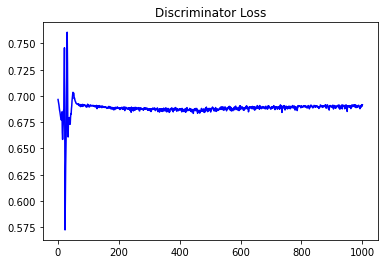

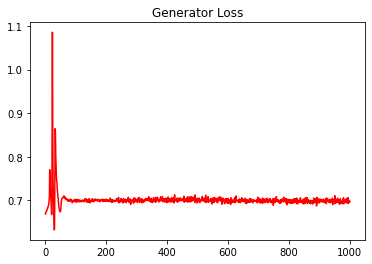

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.32931699684624227


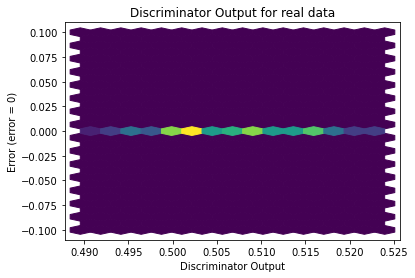

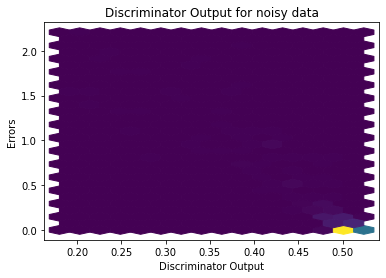

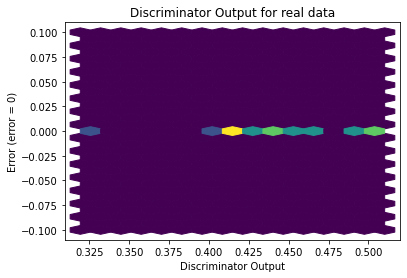

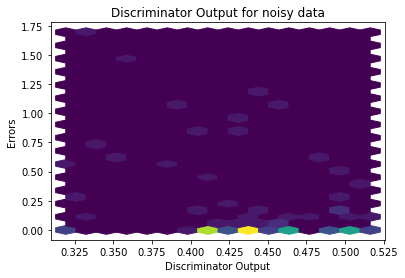

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


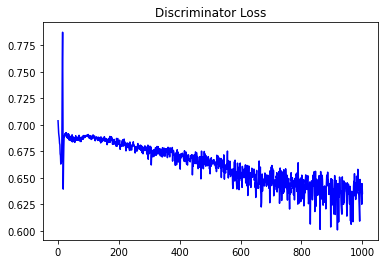

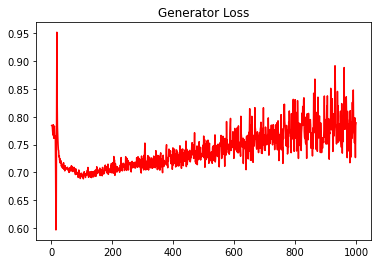

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4222860124442158


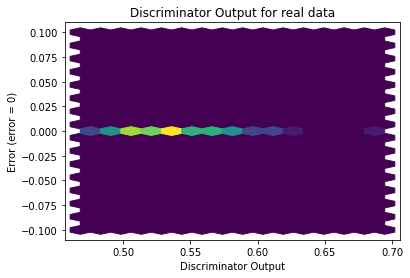

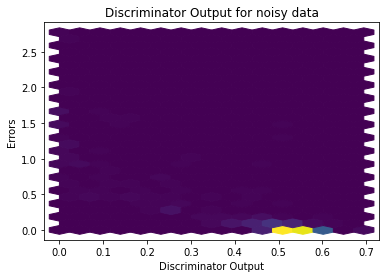

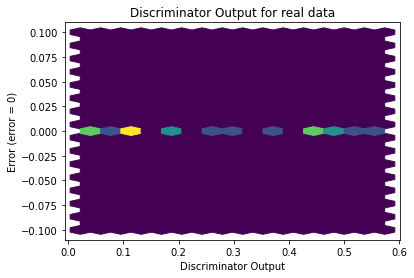

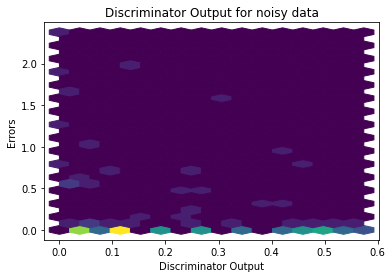

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1284]], requires_grad=True)
